| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../../../README.md) | [⏪](./1.DEFINICIONES.ipynb)| [⏩](./3.ARIMA.ipynb)|

# **2. MODELOS DE SUAVIZAMIENTO**

## **Suavizamiento exponencial de 1er. orden**

El suavizamiento exponencial de primer orden, también conocido como suavizamiento exponencial simple, es una técnica utilizada para predecir valores futuros en una serie de tiempo. Se basa en asignar pesos exponenciales decrecientes a los valores pasados de la serie, donde el peso disminuye exponencialmente a medida que nos alejamos en el tiempo.

El suavizamiento exponencial de primer orden se puede implementar utilizando la fórmula de actualización de la media ponderada exponencial:

$S(t) = α * X(t) + (1 - α) * S(t-1)$

**donde:**

* $S(t)$ es el valor suavizado en el momento $t$.
* $X(t)$ es el valor observado en el momento $t$.
* $α$ es el factor de suavizado, que controla el peso dado a los valores pasados. Debe estar en el rango (0, 1).

A medida que aumenta el valor de $α$, se da más peso a los valores más recientes de la serie, lo que hace que la predicción sea más sensible a los cambios recientes. Por otro lado, un valor de $α$ más bajo da más peso a los valores pasados, lo que resulta en una predicción más suavizada y menos sensible a los cambios recientes.

Ahora veamos un ejemplo de cómo implementar el suavizamiento exponencial de primer orden en Python utilizando la biblioteca pandas:

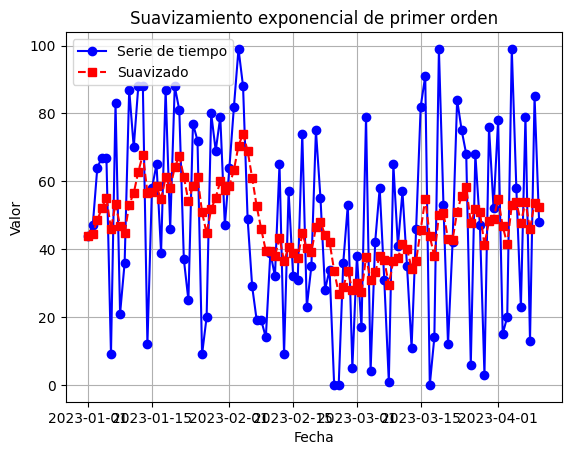

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generar una serie de tiempo sintética
np.random.seed(0)
datos = np.random.randint(0, 100, size=100)

# Crear un DataFrame con la serie de tiempo
fechas = pd.date_range(start='2023-01-01', periods=len(datos), freq='D')
serie_tiempo = pd.DataFrame({'valor': datos}, index=fechas)

# Aplicar el suavizamiento exponencial de primer orden
alpha = 0.2  # Factor de suavizado
serie_tiempo['suavizado'] = serie_tiempo['valor'].ewm(alpha=alpha, adjust=False).mean()

# Graficar la serie de tiempo y el suavizado con personalización
plt.plot(serie_tiempo['valor'], marker='o', linestyle='-', color='b', label='Serie de tiempo')
plt.plot(serie_tiempo['suavizado'], marker='s', linestyle='--', color='r', label='Suavizado')
plt.title('Suavizamiento exponencial de primer orden')
plt.xlabel('Fecha')
plt.ylabel('Valor')

# Personalizaciones adicionales
plt.grid(True)  # Mostrar cuadrícula

# Mostrar la leyenda en la mejor posición
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()

En este ejemplo, generamos una serie de tiempo sintética con 100 valores aleatorios. Luego, aplicamos el suavizamiento exponencial de primer orden utilizando el método `ewm()` de pandas, que realiza el cálculo del suavizado exponencial móvil. Específicamente, utilizamos el parámetro alpha para controlar el factor de suavizado. Finalmente, graficamos la serie de tiempo original y el suavizado.

El resultado es un gráfico que muestra tanto la serie de tiempo original como la serie suavizada. Observarás que la serie suavizada sigue la tendencia general de la serie original pero es más suavizada y menos sensible a las fluctuaciones a corto plazo.

Recuerda que el valor de alpha puede ajustarse según tus necesidades. Valores más altos de alpha darán más peso a los valores recientes y harán que la predicción sea más sensible a los cambios recientes, mientras que valores más bajos darán más peso a los valores pasados y producirán una predicción más suavizada.

## **Suavizamiento exponencial de 2do. orden**

El suavizamiento exponencial de segundo orden, también conocido como suavizamiento exponencial doble, es una técnica utilizada para predecir valores futuros en una serie de tiempo. A diferencia del suavizamiento exponencial de primer orden, el suavizamiento exponencial de segundo orden toma en cuenta tanto la tendencia como la estacionalidad de la serie.

El suavizamiento exponencial de segundo orden se basa en dos componentes principales: el nivel y la pendiente. El nivel representa el nivel base de la serie de tiempo, mientras que la pendiente indica la tasa de cambio o tendencia de la serie. Estos dos componentes se actualizan utilizando fórmulas de suavizamiento exponencial.

La fórmula de actualización para el nivel es:

$L(t) = α * X(t) + (1 - α) * (L(t-1) + T(t-1))$

**donde:**

* $L(t)$ es el nivel en el momento $t$.
* $X(t)$ es el valor observado en el momento $t$.
* $α$ es el factor de suavizado para el nivel.
* $L(t-1)$ es el nivel en el momento anterior.
* $T(t-1)$ es la pendiente en el momento anterior.

La fórmula de actualización para la pendiente es:

$T(t) = β * (L(t) - L(t-1)) + (1 - β) * T(t-1)$

**donde:**

* $T(t)$ es la pendiente en el momento $t$.
* $β$ es el factor de suavizado para la pendiente.
* $L(t)$ y $L(t-1)$ son los niveles en los momentos $t$ y $t-1$, respectivamente.
* $T(t-1)$ es la pendiente en el momento anterior.

Para realizar predicciones futuras, utilizamos las fórmulas de actualización del nivel y la pendiente para calcular los valores predichos:

$Y(t+1) = L(t) + T(t)$

**donde:**

* $Y(t+1)$ es el valor predicho en el siguiente momento.

Veamos un ejemplo de cómo implementar el suavizamiento exponencial de segundo orden en Python utilizando la biblioteca pandas:

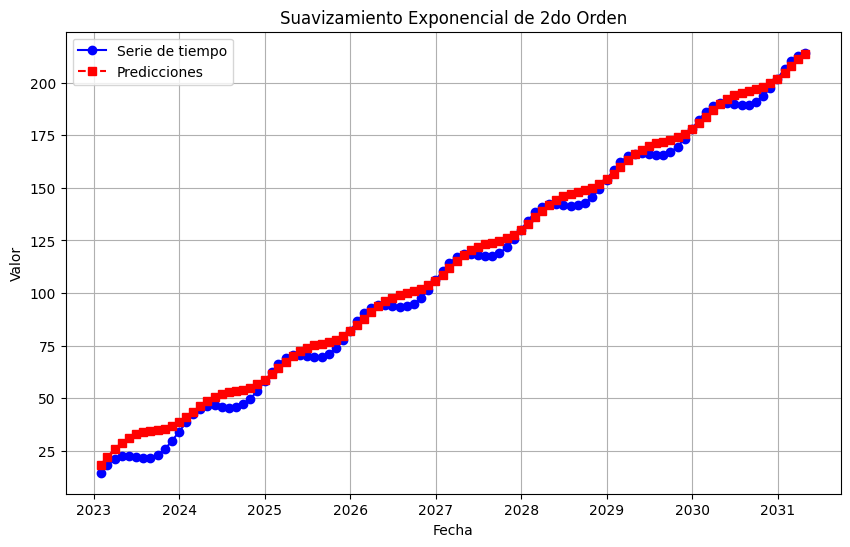

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generar una serie de tiempo sintética con tendencia y estacionalidad
np.random.seed(0)
t = np.arange(1, 101)
datos = 10 + 2 * t + 5 * np.sin(2 * np.pi * t / 12)

# Crear un DataFrame con la serie de tiempo
fechas = pd.date_range(start='2023-01-01', periods=len(datos), freq='M')
serie_tiempo = pd.DataFrame({'valor': datos}, index=fechas)

# Aplicar el suavizamiento exponencial de segundo orden
alpha = 0.2  # Factor de suavizado para el nivel
beta = 0.1  # Factor de suavizado para la pendiente
serie_tiempo['nivel'] = np.nan
serie_tiempo['pendiente'] = np.nan

# Inicializar los valores iniciales para el nivel y la pendiente
serie_tiempo.at[fechas[0], 'nivel'] = serie_tiempo['valor'].iloc[0]
serie_tiempo.at[fechas[0], 'pendiente'] = serie_tiempo['valor'].iloc[1] - serie_tiempo['valor'].iloc[0]

# Calcular los valores de nivel y pendiente para los siguientes momentos
for i in range(1, len(serie_tiempo)):
    nivel_anterior = serie_tiempo['nivel'].iloc[i - 1]
    pendiente_anterior = serie_tiempo['pendiente'].iloc[i - 1]
    valor_actual = serie_tiempo['valor'].iloc[i]
    serie_tiempo.at[fechas[i], 'nivel'] = alpha * valor_actual + (1 - alpha) * (nivel_anterior + pendiente_anterior)
    serie_tiempo.at[fechas[i], 'pendiente'] = beta * (serie_tiempo['nivel'].iloc[i] - nivel_anterior) + (1 - beta) * pendiente_anterior

# Calcular las predicciones futuras
predicciones = serie_tiempo['nivel'] + serie_tiempo['pendiente']

# Graficar la serie de tiempo y las predicciones con personalización
plt.figure(figsize=(10, 6))
plt.plot(serie_tiempo.index, serie_tiempo['valor'], marker='o', linestyle='-', color='b', label='Serie de tiempo')
plt.plot(serie_tiempo.index, predicciones, marker='s', linestyle='--', color='r', label='Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Suavizamiento Exponencial de 2do Orden')
plt.legend()

# Personalizaciones adicionales
plt.grid(True)  # Mostrar cuadrícula

# Mostrar la gráfica
plt.show()

En este ejemplo, generamos una serie de tiempo sintética con una tendencia creciente y una estacionalidad sinusoidal. Luego, aplicamos el suavizamiento exponencial de segundo orden para predecir los valores futuros. Finalmente, graficamos la serie de tiempo original y las predicciones.

Es importante tener en cuenta que los factores de suavizado (`alpha` y `beta`) deben ajustarse según las características de la serie de tiempo para obtener las mejores predicciones.

## **Método de Holt - Winters**

El método de Holt-Winters, también conocido como suavizamiento exponencial triple, es una técnica utilizada para predecir valores futuros en una serie de tiempo que exhibe tendencia y estacionalidad. A diferencia del suavizamiento exponencial de primer y segundo orden, el método de Holt-Winters toma en cuenta tanto la tendencia como la estacionalidad de manera más precisa.

El método de Holt-Winters se basa en tres componentes principales: el nivel, la tendencia y la estacionalidad. El nivel representa el nivel base de la serie de tiempo, la tendencia indica la dirección y la tasa de cambio de la serie, y la estacionalidad refleja los patrones recurrentes en la serie.

El método de Holt-Winters utiliza tres ecuaciones de actualización para los componentes:

**Actualización del nivel:**

$L(t) = α * (X(t) - S(t-m)) + (1 - α) * (L(t-1) + T(t-1))$

**donde:**

* $L(t)$ es el nivel en el momento $t$.
* $X(t)$ es el valor observado en el momento $t$.
* $S(t-m)$ es el componente estacional en el momento $t-m$, donde $m$ es el período de estacionalidad.
* $α$ es el factor de suavizado para el nivel.
* $L(t-1)$ es el nivel en el momento anterior.
* $T(t-1)$ es la tendencia en el momento anterior.

**Actualización de la tendencia:**

$T(t) = β * (L(t) - L(t-1)) + (1 - β) * T(t-1)$

**donde:**

* $T(t)$ es la tendencia en el momento $t$.
* $β$ es el factor de suavizado para la tendencia.
* $L(t)$ y $L(t-1)$ son los niveles en los momentos $t$ y $t-1$, respectivamente.
* $T(t-1)$ es la tendencia en el momento anterior.

**Actualización de la estacionalidad:**

$S(t) = γ * (X(t) - L(t)) + (1 - γ) * S(t-m)$

**donde:**

* $S(t)$ es el componente estacional en el momento $t$.
* $γ$ es el factor de suavizado para la estacionalidad.
* $X(t)$ es el valor observado en el momento $t$.
* $L(t)$ es el nivel en el momento $t$.
* $S(t-m)$ es el componente estacional en el momento $t-m$, donde $m$ es el período de estacionalidad.

Para realizar predicciones futuras, utilizamos las fórmulas de actualización del nivel, la tendencia y la estacionalidad para calcular los valores predichos:



$Y(t+h) = L(t) + h * T(t) + S(t+h-m)$

**donde:**

* $Y(t+h)$ es el valor predicho en el momento $t+h$.
* $h$ es el horizonte de predicción.
* $L(t)$ es el nivel en el momento $t$.
* $T(t)$ es la tendencia en el momento $t$.
* $S(t+h-m)$ es el componente estacional en el momento $t+h-m$, donde $m$ es el período de estacionalidad.

Veamos un ejemplo de cómo implementar el método de Holt-Winters en Python utilizando la biblioteca pandas:


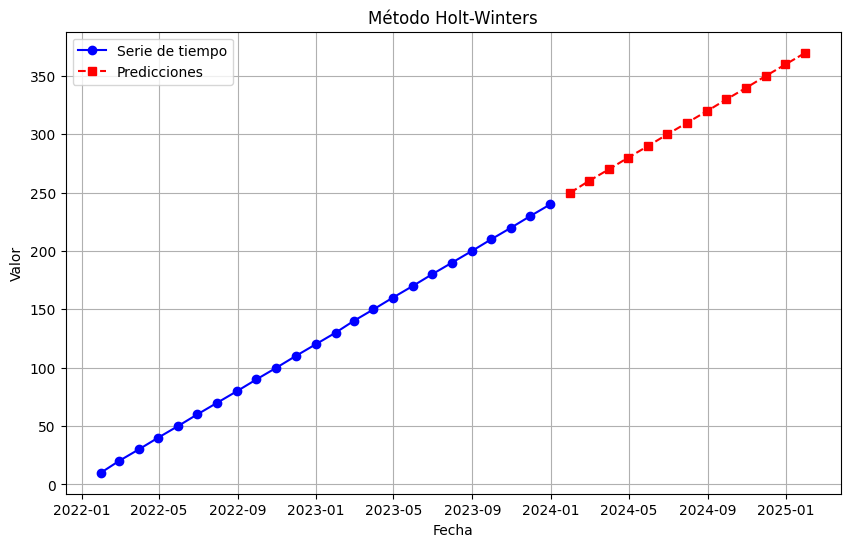

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Crear una serie de tiempo sintética con tendencia y estacionalidad
fechas = pd.date_range(start='2022-01-01', end='2023-12-31', freq='M')
valores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240]
serie_tiempo = pd.Series(valores, index=fechas)

# Aplicar el método Holt-Winters
modelo = ExponentialSmoothing(serie_tiempo, trend='add', seasonal='add', seasonal_periods=12)
modelo_fit = modelo.fit()

# Generar predicciones
last_observation = serie_tiempo.index[-1]
start_date = last_observation + pd.DateOffset(months=1)
end_date = start_date + pd.DateOffset(months=12)  # Establecer la fecha de finalización 12 meses después de la fecha de inicio
predicciones = modelo_fit.predict(start=start_date, end=end_date)

# Graficar la serie de tiempo y las predicciones con personalización
plt.figure(figsize=(10, 6))
plt.plot(serie_tiempo.index, serie_tiempo, marker='o', linestyle='-', color='b', label='Serie de tiempo')
plt.plot(predicciones.index, predicciones, marker='s', linestyle='--', color='r', label='Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Método Holt-Winters')

# Personalizaciones adicionales
plt.grid(True)  # Mostrar cuadrícula

# Mostrar la leyenda en la mejor posición
plt.legend(loc='best')

# Mostrar la gráfica
plt.show()

En este ejemplo, creamos una serie de tiempo sintética con una tendencia creciente y una estacionalidad mensual. Luego, aplicamos el método de Holt-Winters con `trend='add'` para modelar una tendencia aditiva y `seasonal='add'` para modelar una estacionalidad aditiva con un período de estacionalidad de 12 meses. A continuación, generamos predicciones para el año 2023 y graficamos la serie de tiempo original y las predicciones.

Es importante ajustar los parámetros `trend`, `seasonal`, `seasonal_periods` según las características de la serie de tiempo para obtener las mejores predicciones.

| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../../../README.md) | [⏪](./1.DEFINICIONES.ipynb)| [⏩](./3.ARIMA.ipynb)|